## Objectives

Authors/Copyright: Masa Prodanovic and James McClure, all right reserved.\
Update: October 2020

In this lecture we will work with visual inspection of a volumetric data (3D stack). Unlike 2D images that have widely adopted, if different, image formats (jpeg, png, tiff...), the same is not true for 3D data. 

In addition to well documented formats (tiff, netcdf, or simply a stack of indexed 2D images stored as tifs or jpegs), it is very common to store them as binary arrays in which case someone has to tell you what image size, data type and endian-ness is (or email you or save somewhere or...you see how that information can be easily lost). 

Sometimes images are even saved as text (ASCII, human-readable rather than binary) data, which has limitations on number types, accuracy and size.

Additional resources: 
- Check out associated introduction slides
- http://scipy-lectures.org/packages/3d_plotting/index.html

## Imports
For better clarity, let's import all required modules here at the beginning.

In [1]:
import requests # library for file download

import numpy as np
import matplotlib.pyplot as plt

# - Requires 'conda install mayavi' in Terminal (note that under Windows, 
# - You need to run Anaconda Powershell as administrator (right click on it))
# - You might need to update all installed packages to make it work. 
#    'conda update --all', also as an administrator

from mayavi import mlab

## Basic review of 3D data ordering in NumPy array

In [2]:
# create a simple 3D array of all zeros and print it, 
# so we see how NumPy visualizes positions.
slices = 2
height = 3
width  = 4
A = np.zeros([slices,height,width])

print('original\n',A)

# Now we will modify certain positions to understand where 
# specific locations are

A[1,:,:]=1
print('change\n',A)


A[0,2,:] = 6
print('change\n',A)

A.shape = (1,24)
print('This shows how 3D array would be fit into a continous section', 
      'of memory when written as a binary file\n',A)

original
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
change
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
change
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [6. 6. 6. 6.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
This shows how 3D array would be fit into a continous section of memory when written as a binary file
 [[0. 0. 0. 0. 0. 0. 0. 0. 6. 6. 6. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


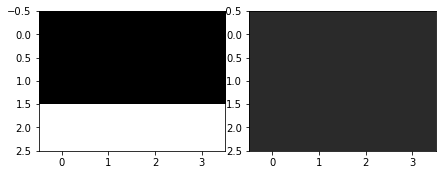

In [3]:
# reshape to the original shape
A.shape = (2,3,4)

fig, axes = plt.subplots(1, 2, tight_layout=True);

axes[0].imshow(A[0,:,:], cmap='gray',vmin=0,vmax=6);
axes[1].imshow(A[1,:,:], cmap='gray',vmin=0,vmax=6);
print(A[1,:,:])



## Example: proxy vuggy carbonate CT scan
Straining in vuggy media, Project 214, VS4005

Numpy data types -- select the data type that matches your data!

- ```np.byte``` -- signed 8-bit integer
- ```np.ubyte``` -- unsigned 8-bit integer
- ```np.int16``` -- signed 16-bit integer
- ```np.unit16``` -- unsigned 16-bit integer 
- ```np.single``` -- single precision floating point
- ```np.double``` -- double precision floating point

Refer to the following for a complete list
https://numpy.org/doc/stable/user/basics.types.html

Byte ordering convention also matters (big vs little endian)

```np.dtype.byteorder```

https://numpy.org/doc/stable/user/basics.byteswapping.html

In [4]:
#Read the image from Digital Rocks Portal

file_url = "https://www.digitalrocksportal.org/projects/214/images/133772/download/"
filename = "VS4005f_234x234x19x8bit.raw"

# download file
r = requests.get(file_url, stream = True) 
  
with open(filename,"wb") as f: 
    for chunk in r.iter_content(chunk_size=1024): 
  
         #writing one chunk at a time to pdf file 
         if chunk: 
            f.write(chunk) 

# the file is binary (.raw) file, and requires information from 
# the webpage on how to read it.
width  = 234
height = 234
slices = 19

# read date from file
alldata = np.fromfile(filename, np.ubyte, sep="")

alldata.dtype.byteorder

'|'

## Layout for 3D data

- Computer memory is one-dimensional

- Order for data layout must match the convention from the original input file

We will plot the 5th slice (cross-section) below.
Note that there is a vug (large opening) embeded in the matrix of sintered glass beads.

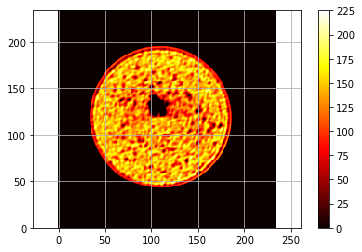

In [5]:
alldata.shape = (slices,height,width)

# Test what happens when you mix up dimensions
#alldata.shape = (height,width,slices)

image=alldata[5,:,:]
plt.figure(1)
plt.pcolormesh(image,cmap='hot')
plt.grid(True)
plt.axis('equal')
plt.colorbar()
plt.show()

## Interactive Visualization with Mayavi

We review interactive 3D visualization with Mayavi.

Enthought company that specializes in scientific Python tools also maintains 3D visualization software Mayavi; as a result the two are well integrated. Most importantly for our applications, we can directly visualize NumPy arrays.

Mayavi can be used as a standalone visualizing software, but we will use it within Python (specific library is called mlab).

Installation:

first update your Anaconda distribution (as that removes issues that could pop up): ‘conda update –all’
Install Mayavi: ‘conda install mayavi’
The above commands need to be run as an administrator in Anaconda powershell or Anaconda prompt (on Windows 10, right-click on the prompt)
Online resources:

https://docs.enthought.com/mayavi/mayavi/



## Volume slicing example from Digital Rocks Portal

See the following link for tips on using mayavi in jupyter notebooks

https://docs.enthought.com/mayavi/mayavi/tips.html


In [6]:
mlab.options.offscreen = True
mlab.volume_slice(alldata, plane_orientation='x_axes', colormap='hot')
mlab.savefig('VS4005f_slice3D.png')

## mlab.points3d 
This function plots points in 3D, represented with markers (or “glyphs”) and optionaly different sizes.

In [7]:
# A simple 3D plot of points in space
mlab.options.offscreen = False
# Create data
# a 1D array
x=np.linspace(1,4,4)

# structured grid of 4 by 4 by 4 points (i.e. 3D) dictated by 1D array x
X,Y,Z=np.meshgrid(x,x,x) 
r = np.sqrt(X*X + Y*Y + Z*Z) #

# opens up a separate Mayavi scene
mlab.figure(bgcolor=(1,1,1),size=(800,800))

# point3d is a function for plotting individual points with coordinates 
# (x,y,z), with optional parameters 'r' that
# modify sizes/colors of the markers for each point.
mlab.points3d(X,Y,Z,r,resolution=16,opacity=0.7)
mlab.show() #IMPORTANT to include in J. Notebooks or Spyder 

## 3D surface plot using mplotlib
This is classical way to do 3D plots in Python. It works fine, but the result is not interactive. For 3D data, whose visualization requires quite a bit of user input (there is no such thing as a default option working in most scientific 3D data visualization applications), this is barely adequate.

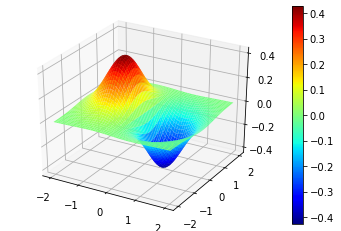

In [8]:
# 3D surface plot

# Create data for surface plot
# Native matplotlib image is static

import numpy as np
x=np.linspace(-2,2,500)
y = np.linspace(-2,2,500)
#print(x)
#print(y)

X,Y = np.meshgrid(x,y)
#print(X)
#print(Y)

Z = -X*(np.exp(- X**2 - Y**2))
#print(Z)

#First we plot it with matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() #opens up empty figure

# tell the figure there will be a 3d projection
ax = fig.add_subplot(111,projection='3d')

# surface plot
surf = ax.plot_surface(X,Y,Z,cmap='jet')
# add colorbar
fig.colorbar(surf)

## 3D surface plot using Mayavi
This script opens up a separate Mayavi scene, and the main benefit is that we can interact with the plot. The sequence of required steps (creating data on a regular grid) is similar to the above matplotlib example, alas slightly different gridding function has to be used (mgrid).

Documentation on Python scripting that visualizes data in Mayavi (mlab module): https://docs.enthought.com/mayavi/mayavi/mlab.html


In [9]:
#Create data

# for Mayavi applications, we need to use mgrid, 
# do not confuse with meshgrid.
# http://louistiao.me/posts/numpy-mgrid-vs-meshgrid/
# Note the square brackets and the use of complex number 
# 100j to define 100 points 
X,Y = np.mgrid[-2:2:100j,-2:2:100j]

# Create surface by defining height Z(i,j) for every (X(i,j), Y(i,j))
Z = -X*(np.exp(- X**2 - Y**2))

mlab.figure(size=(800,800)) # changing size because default is too small

# optional: test this
# color (1,1,1) is white
# color (0,0,0) is black
# mlab.figure(size=(600,600),bgcolor=(1,1,1),fgcolor=(0,0,0))

# Option 1,
mlab.surf(X,Y,Z,warp_scale=4.0) #warp_scale is optional; if ommitted scaling does not look right 

# Option 2: contour plot
#mlab.contour_surf(X,Y,Z,contours=16) # 16 is the number of contours


mlab.outline() # show box outline of the plot
    
mlab.axes(xlabel='x',ylabel='y',zlabel='z', ranges=(-2, 2, -2, 2, -2, 2),nb_labels=5)

mlab.orientation_axes() #small axes pointing in x,y,z directions

mlab.colorbar()

mlab.show() 

## Plot 2D image slice as a 3D surface
This example interprets 2D image data as height.

We will go back to the image downloaded above and plot 5th slice.

Note that this is CT image where only vug is well resolved, and the
rest of the data is noisy (unresolved).

We are providing only slice data (of heights), equivalent to Z array in the nice surface plot examples above.


In [ ]:
mlab.figure(size=(800,800))
mlab.surf(alldata[5,:,:])
mlab.colorbar()
mlab.show()